In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
dataset = pd.read_csv('musicData.csv')
dataset.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
print(dataset.isnull().sum())

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


In [5]:
# to see how many rows contain missing value
mask = dataset.isnull().any(axis=1)
print(mask.sum())

5


In [6]:
bad_rows = dataset[mask]
print("\nMissing-field counts per row:")
print(bad_rows.isnull().sum(axis=1))


Missing-field counts per row:
10000    18
10001    18
10002    18
10003    18
10004    18
dtype: int64


In [7]:
# it means row 10000, 10001, 10002, 10003 and 10004 are completely empty (18/18 columns missing)

In [8]:
dataset_clean = dataset.dropna(how="all")

In [9]:
print(dataset_clean.isnull().sum())
dataset_clean.info()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumental

In [10]:
dataset_clean.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [11]:
print(dataset_clean['music_genre'].value_counts())

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


In [12]:
print(dataset_clean['mode'].isnull().sum()) 

0


In [13]:
# make a clean copy of the dataset, because dataset_clean is a slice of dataset
dataset_clean = dataset_clean.copy()
dataset_clean['duration_ms'] = dataset_clean['duration_ms'].apply(lambda x: np.nan if x <= 0 else x)
numeric_feats = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categorical_feats = ['key', 'mode']
target_col = ['music_genre']
for col in numeric_feats:
    dataset_clean[col] = pd.to_numeric(dataset_clean[col], errors='coerce')
    dataset_clean[col].fillna(dataset_clean[col].median(), inplace=True)
# map musical key
key_order = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
key_map = {k: i for i, k in enumerate(key_order)}
key_map['UNKNOWN'] = -1
dataset_clean['key'] = (dataset_clean['key'].fillna('UNKNOWN').map(key_map))
# fill and one-hot categorical mode features
dataset_clean['is_major'] = (dataset_clean['mode'] == 'Major').astype(int)
dataset_clean.drop(columns=['mode'], inplace=True)
# encode genre labels to integers
le = LabelEncoder()
drop_col = to_drop = ['instance_id','artist_name','track_name','obtained_date']
dataset_clean.drop(columns = drop_col, inplace=True)

In [14]:
dataset_clean.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,is_major
0,27.0,0.00468,0.652,227360.0,0.941,0.79200,10,0.115,-5.201,0.0748,100.889,0.759,Electronic,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,2,0.124,-7.043,0.0300,115.002,0.531,Electronic,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,8,0.534,-4.617,0.0345,127.994,0.333,Electronic,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,1,0.157,-4.498,0.2390,128.014,0.270,Electronic,1
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,6,0.157,-6.266,0.0413,145.036,0.323,Electronic,1


In [15]:
#initialize two empty dataframes
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for genre in dataset_clean['music_genre'].unique():
    genre_df = dataset_clean[dataset_clean['music_genre'] == genre]
    # randomly choose 500 songs in each genre for test data
    genre_train, genre_test = train_test_split(genre_df, test_size=500, random_state = 15)
    train_data = pd.concat([train_data, genre_train])
    test_data = pd.concat([test_data, genre_test])
    
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

X_train = train_data.drop(columns=['music_genre'])
y_train = train_data['music_genre']
X_test = test_data.drop(columns=['music_genre'])
y_test = test_data['music_genre']

# convert category labels of the genres to numerical label
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [16]:
numeric_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
# is_major column is previous mode column
categorical_features = ['is_major', 'key']
# scale features (exclude categorical features)
scaler = StandardScaler()
# fit only on numeric features
X_train_numeric_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_numeric_scaled = scaler.transform(X_test[numeric_features])
# recombine
X_train_scaled = pd.DataFrame(X_train_numeric_scaled, columns=numeric_features)
X_test_scaled = pd.DataFrame(X_test_numeric_scaled, columns=numeric_features)
X_train_scaled[categorical_features] = X_train[categorical_features].reset_index(drop=True)
X_test_scaled[categorical_features] = X_test[categorical_features].reset_index(drop=True)

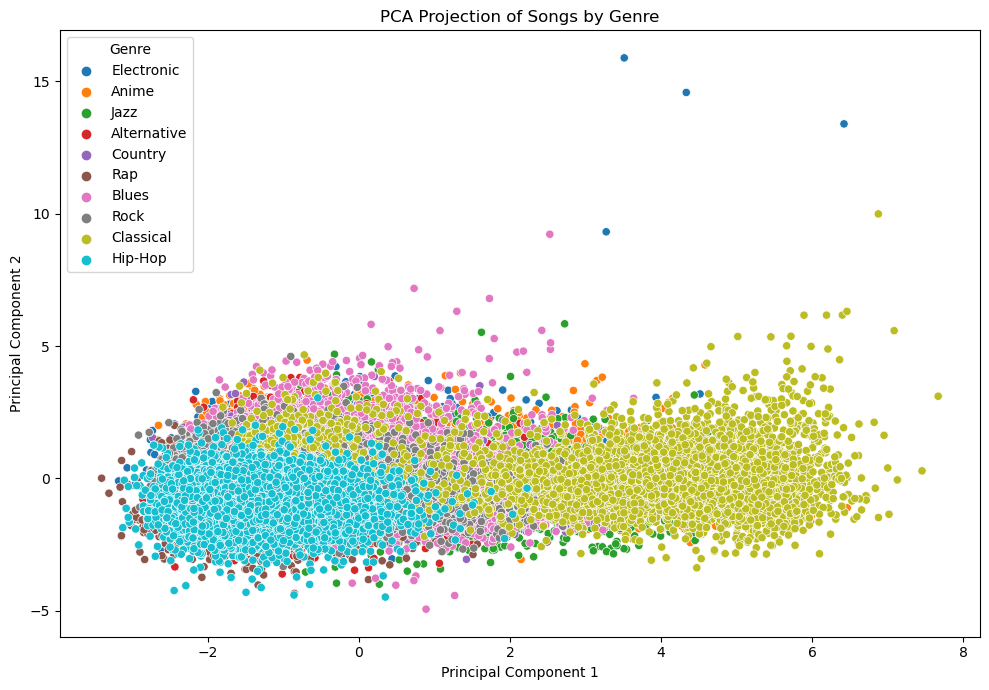

In [17]:
# PCA
X_pca_input = X_train_scaled[numeric_features]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Genre'] = y_train.values
plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Genre', palette='tab10')
plt.title('PCA Projection of Songs by Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Genre', loc='upper left')
plt.tight_layout()
plt.show()

Epoch 1/80, Loss:  56840.7017
Epoch 2/80, Loss:  52298.2305
Epoch 3/80, Loss:  51140.8882
Epoch 4/80, Loss:  50194.0604
Epoch 5/80, Loss:  49595.0415
Epoch 6/80, Loss:  49150.1897
Epoch 7/80, Loss:  48819.0395
Epoch 8/80, Loss:  48524.6417
Epoch 9/80, Loss:  48388.3815
Epoch 10/80, Loss:  48144.0958
Epoch 11/80, Loss:  47887.9080
Epoch 12/80, Loss:  47877.3463
Epoch 13/80, Loss:  47658.1528
Epoch 14/80, Loss:  47616.5046
Epoch 15/80, Loss:  47516.9248
Epoch 16/80, Loss:  47422.7169
Epoch 17/80, Loss:  47421.5586
Epoch 18/80, Loss:  47391.9757
Epoch 19/80, Loss:  47265.1351
Epoch 20/80, Loss:  47241.5035
Epoch 21/80, Loss:  47225.0676
Epoch 22/80, Loss:  47181.6807
Epoch 23/80, Loss:  47211.4066
Epoch 24/80, Loss:  47180.5258
Epoch 25/80, Loss:  47173.2657
Epoch 26/80, Loss:  47041.2651
Epoch 27/80, Loss:  46996.0080
Epoch 28/80, Loss:  47040.2162
Epoch 29/80, Loss:  47013.0358
Epoch 30/80, Loss:  46963.8217
Epoch 31/80, Loss:  47059.9887
Epoch 32/80, Loss:  46885.0428
Epoch 33/80, Loss

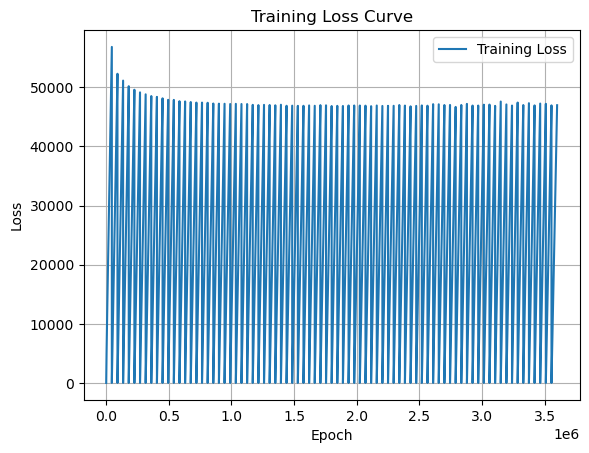

In [18]:
# neural network model
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor))

#build neural network
class GenreClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GenreClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim,64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )
    def forward(self,x):
        return self.net(x)

model = GenreClassifier(input_dim=X_train_tensor.shape[1], output_dim=10)

#train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
epochs = 80
train_losses = []
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        train_losses.append(total_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss: .4f}")
    
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

Test Accuracy: 0.5756


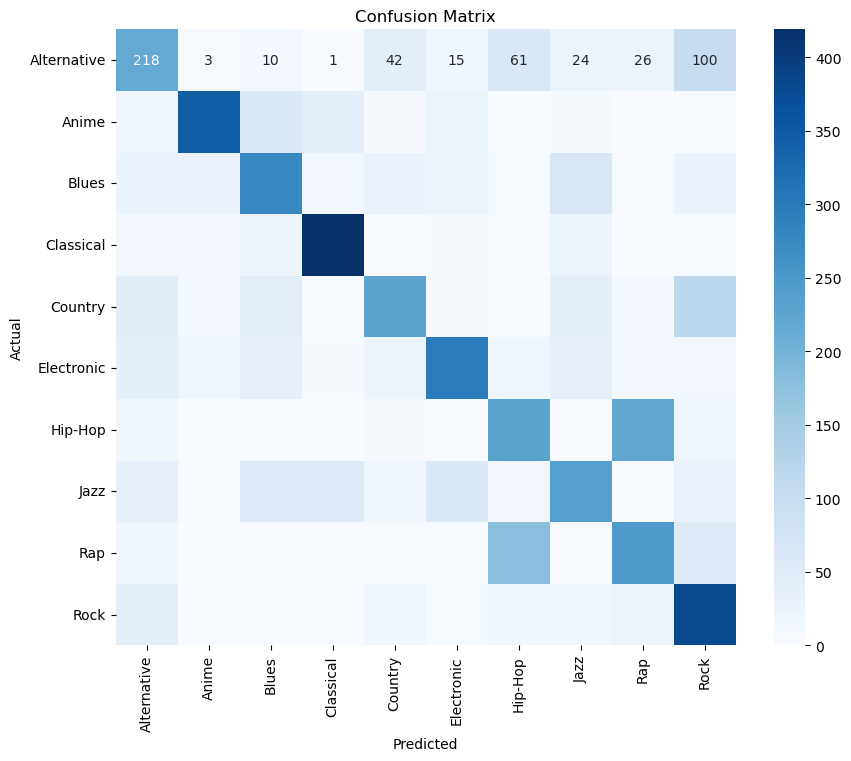

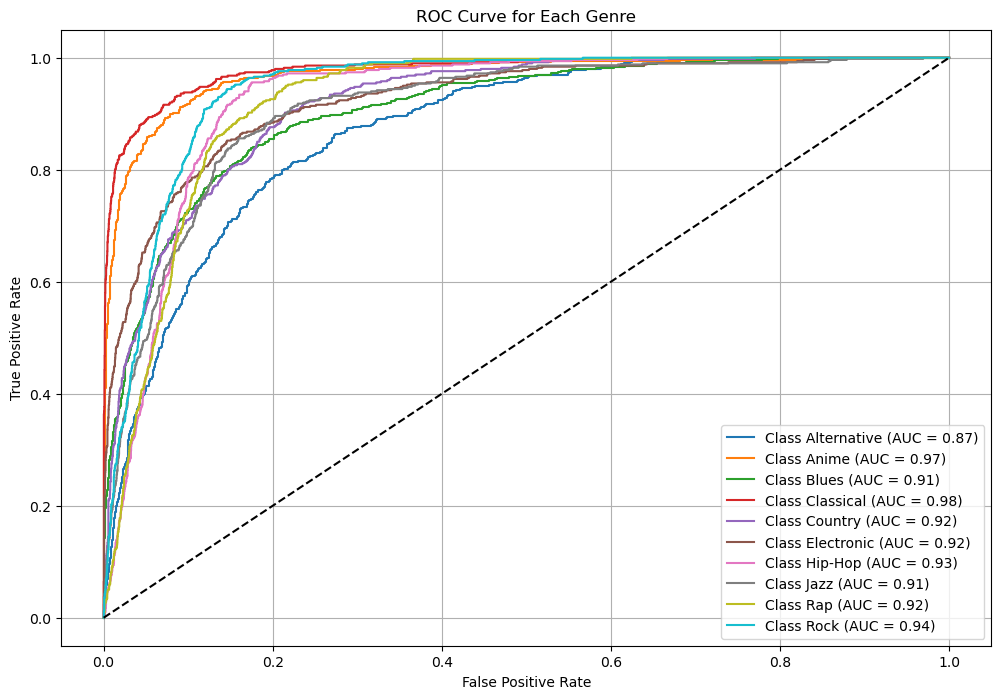

Macro-average AUC: 0.9267460888888888


In [19]:
# Put model in evaluation mode
model.eval()
all_preds = []
all_probs = []

# Turn off gradient tracking
with torch.no_grad():
    for xb, _ in test_loader:
        outputs = model(xb)
        # get class probabilities
        probs = nn.functional.softmax(outputs, dim=1)
        all_probs.append(probs)
        # pick the class with highest probability
        preds = torch.argmax(probs, dim=1)
        all_preds.append(preds)

y_pred_tensor = torch.cat(all_preds)
y_probs_tensor = torch.cat(all_probs)

y_pred = y_pred_tensor.numpy()
y_probs = y_probs_tensor.numpy()

# accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(10))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Genre')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compute macro-average AUC
macro_auc = np.mean(list(roc_auc.values()))
print("Macro-average AUC:", macro_auc)

In [20]:
# the second model: random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=15)
rf_model.fit(X_train_scaled, y_train_encoded)
# Predict
rf_pred = rf_model.predict(X_test_scaled)
rf_probs = rf_model.predict_proba(X_test_scaled)

Random Forest Accuracy: 0.5396


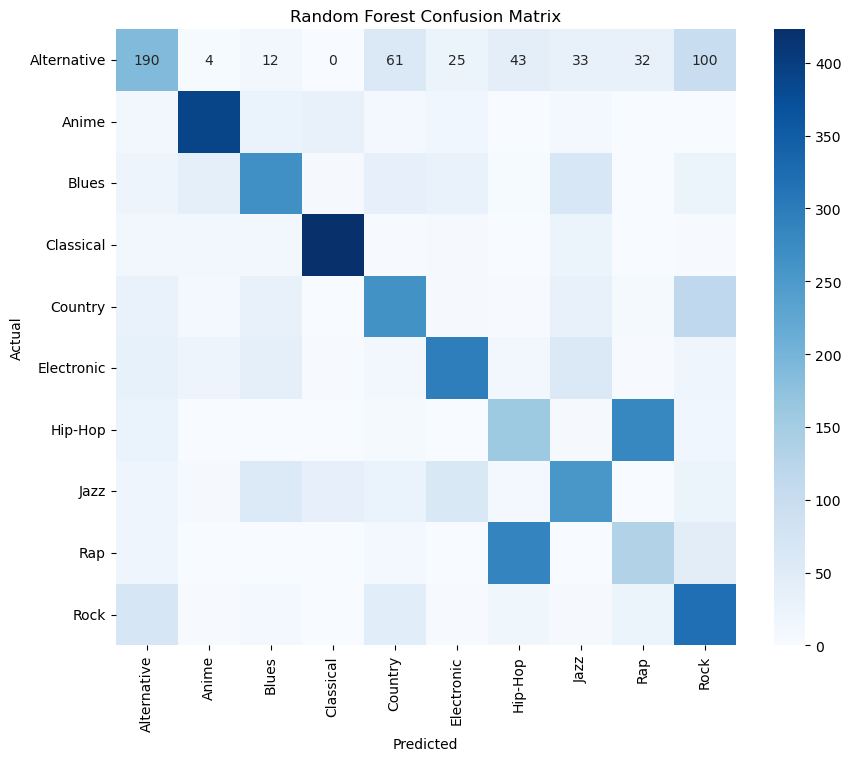

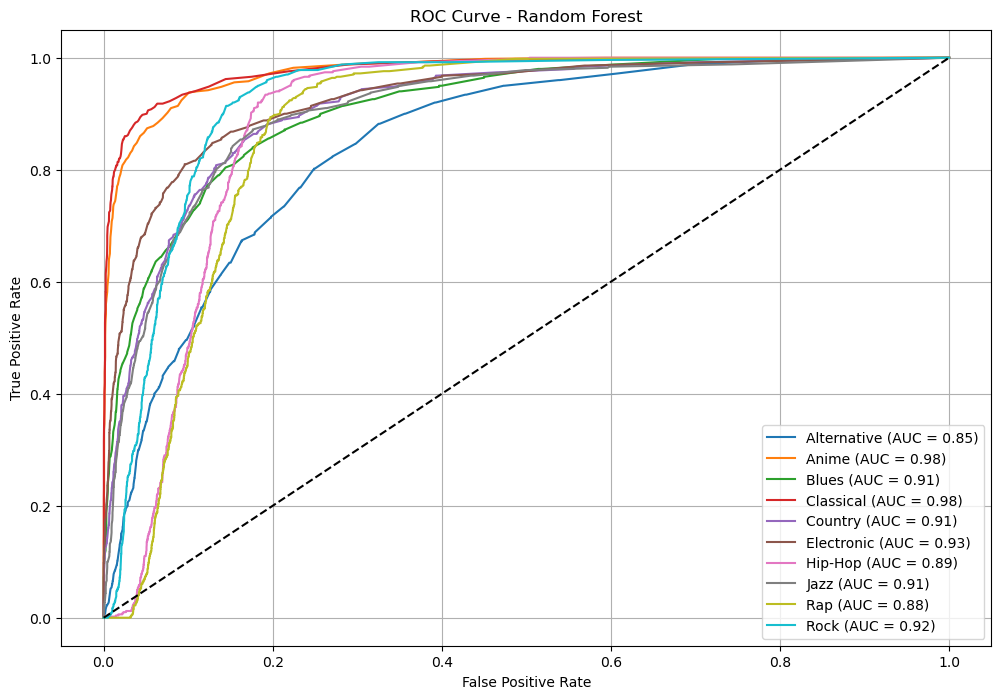

Random Forest Macro-average AUC: 0.915327511111111


In [21]:
# evaluate random forest classifier
# Accuracy
rf_acc = accuracy_score(y_test_encoded, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# Confusion matrix
rf_cm = confusion_matrix(y_test_encoded, rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

# AUC and ROC curves
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(10))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Macro AUC
macro_auc = np.mean(list(roc_auc.values()))
print("Random Forest Macro-average AUC:", macro_auc)

In [22]:
# the third model: gradient boosting classifier
# train the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=15)
gb_model.fit(X_train_scaled, y_train_encoded)
# Predict
gb_pred = gb_model.predict(X_test_scaled)
gb_probs = gb_model.predict_proba(X_test_scaled)

Gradient Boosting Accuracy: 0.5804


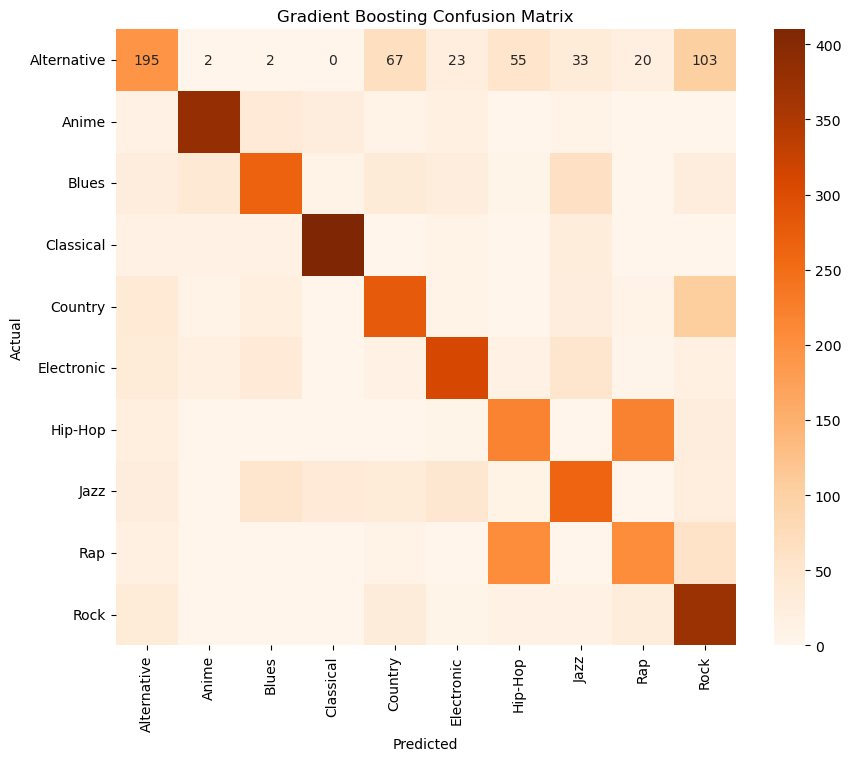

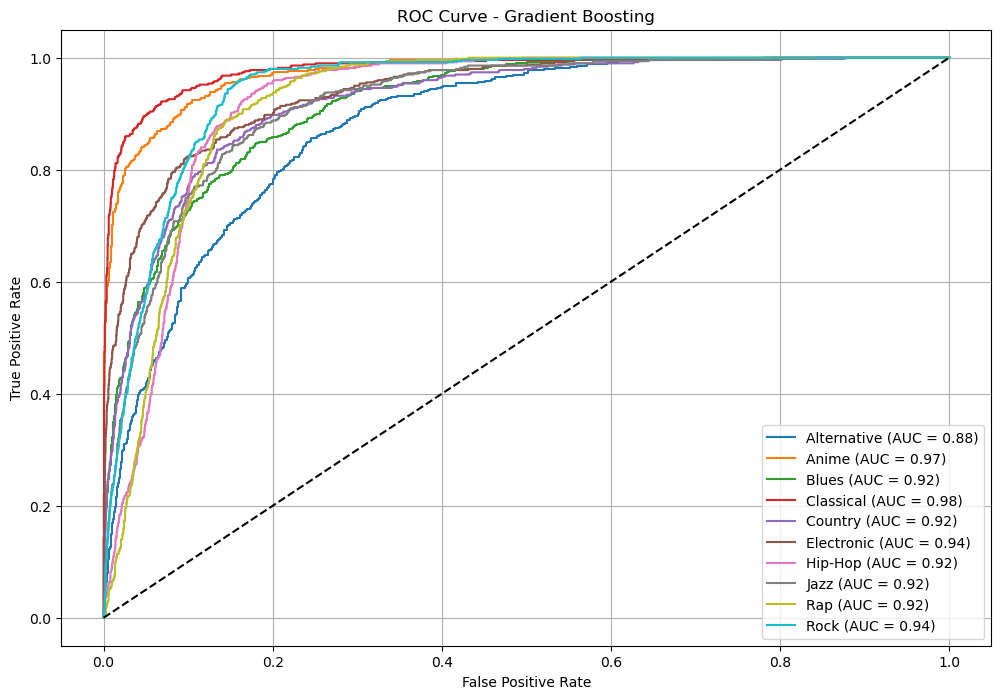

Gradient Boosting Macro-average AUC: 0.9318035555555555


In [23]:
# evaluate the model
# Accuracy
gb_acc = accuracy_score(y_test_encoded, gb_pred)
print("Gradient Boosting Accuracy:", gb_acc)

# Confusion matrix
gb_cm = confusion_matrix(y_test_encoded, gb_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

# AUC and ROC curves
y_test_bin = label_binarize(y_test_encoded, classes=np.arange(10))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], gb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Macro AUC
macro_auc = np.mean(list(roc_auc.values()))
print("Gradient Boosting Macro-average AUC:", macro_auc)